In [1]:
import sys, os
#sys.path.insert(0, os.getcwd() + '//..')
os.chdir('d:/ml/mlbootcamp5')


import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

from datetime import datetime

import qml_workdir.classes

from qml_workdir.classes.config import config


%matplotlib inline

In [2]:
ids_train = pd.read_csv(config.QML_DATA_DIR + "ids_train.csv", index_col='id').index
ids_test = pd.read_csv(config.QML_DATA_DIR + "ids_test.csv", index_col='id').index

In [16]:
DATA_ID = 1

train = pd.read_csv(config.QML_TRAIN_X_FILE_MASK.format(1), index_col='id')
test = pd.read_csv(config.QML_TEST_X_FILE_MASK.format(1), index_col='id')
all = pd.concat([train, test])

all['age_years'] = all['age'] / 365.25
all.ix[all['height']>210, 'height'] = all[all['height']<210]['height'].max()
all['height_low'] = np.int32(all['height']<110)
all.ix[all['height']<110, 'height'] = 110

all['weight_low'] = np.int32(all['weight']<40)
all.ix[all['weight']<40, 'weight'] = 40

all['cholesterol_all'] = all['cholesterol']
all['gluc_all'] = all['gluc']

all = pd.get_dummies(all, columns=['cholesterol', 'gluc'])

all['ap_error'] = 0
all['ap_error_swap'] = 0

all.ix[all['ap_hi']>10000, 'ap_hi'] = np.int64(all.ix[all['ap_hi']>10000, 'ap_hi']/100)
all.ix[all['ap_hi']>10000, 'ap_error'] = 1


all.ix[all['ap_hi']>1000, 'ap_hi'] = np.int64(all.ix[all['ap_hi']>1000, 'ap_hi']/10)
all.ix[all['ap_hi']>1000, 'ap_error'] = 1


all.ix[all['ap_hi']<=-100, 'ap_hi'] = np.int64(-all.ix[all['ap_hi']<=-100, 'ap_hi'])
all.ix[all['ap_hi']<=-100, 'ap_error'] = 1

all.ix[all['ap_hi']<0, 'ap_hi'] = np.int64(-all.ix[all['ap_hi']<0, 'ap_hi'])
all.ix[all['ap_hi']<0, 'ap_error'] = 1


ix = (all['ap_hi']==1) & (all['ap_lo']>1000)
all.ix[ix, 'ap_hi'], all.ix[ix, 'ap_lo'] = \
np.int64( all.ix[ix, 'ap_hi']*100 + all.ix[ix, 'ap_lo']/100), np.int64(((all.ix[ix, 'ap_lo']/10)%10))*10
all.ix[ix, 'ap_error'] = 1

ix = (all['ap_hi']>600) & (all['ap_lo']==0)
all.ix[ix, 'ap_hi'], all.ix[ix, 'ap_lo'] = \
np.int64(all.ix[ix, 'ap_hi']/10), np.int64(all.ix[ix, 'ap_hi']%10)*10
all.ix[ix, 'ap_error'] = 1

ix = (all['ap_hi']>240) &(all['ap_hi']<=600) & (all['ap_lo']==0)
all.ix[ix, 'ap_hi'], all.ix[ix, 'ap_lo'] = \
np.int64(100 + all.ix[ix, 'ap_hi']/10), np.int64(all.ix[ix, 'ap_hi']%10)*10
all.ix[ix, 'ap_error'] = 1


ix = (all['ap_hi']>=400) &(all['ap_hi']<500)
all.ix[ix, 'ap_hi'] = np.int64(all.ix[ix, 'ap_hi'])-300
all.ix[ix, 'ap_error'] = 1


ix = (all['ap_hi']>=900) &(all['ap_hi']<1000)
all.ix[ix, 'ap_hi'] = np.int64(all.ix[ix, 'ap_hi']/100)*10
all.ix[ix, 'ap_error'] = 1


ix = (all['ap_hi']>=700) &(all['ap_hi']<800)
all.ix[ix, 'ap_hi'] = np.int64(all.ix[ix, 'ap_hi']/100)*10+100
all.ix[ix, 'ap_error'] = 1


all.ix[all['ap_lo']<0, 'ap_lo'] = np.int64(-all.ix[all['ap_lo']<0, 'ap_lo'])
all.ix[all['ap_lo']<0, 'ap_error'] = 1


ix = (all['ap_hi']<100) & (all['ap_lo']==0)
all.ix[ix, 'ap_hi'], all.ix[ix, 'ap_lo'] = \
np.int64(all.ix[ix, 'ap_hi']*10), np.int64(all.ix[ix, 'ap_hi']*10-40)
all.ix[ix, 'ap_error'] = 1


ix = (all['ap_hi']>100) & (all['ap_lo']==0) & (all['ap_hi']%10==0)
all.ix[ix, 'ap_lo'] = np.int64(all.ix[ix, 'ap_hi'] - 40)
all.ix[ix, 'ap_error'] = 1


ix = (all['ap_hi']>100) & (all['ap_lo']==0) & (all['ap_hi']%10!=0) & (all['ap_hi']%10>=2)
all.ix[ix, 'ap_hi'], all.ix[ix, 'ap_lo'] = \
np.int64(all.ix[ix, 'ap_hi']/10)*10, np.int64(all.ix[ix, 'ap_hi']%10)*10
all.ix[ix, 'ap_error'] = 1


ix = (all['ap_hi']>100) & (all['ap_lo']==0) & (all['ap_hi']%10!=0) & (all['ap_hi']%10<2)
all.ix[ix, 'ap_hi'], all.ix[ix, 'ap_lo'] = \
np.int64(all.ix[ix, 'ap_hi']/10)*10, np.int64(all.ix[ix, 'ap_hi']%10)*100
all.ix[ix, 'ap_error'] = 1


all.ix[all['ap_lo']>=10000, 'ap_lo'] = np.int64(all.ix[all['ap_lo']>=10000, 'ap_lo']/100)
all.ix[all['ap_lo']>=10000, 'ap_error'] = 1


all.ix[all['ap_lo']>=4500, 'ap_lo'] = np.int64(all.ix[all['ap_lo']>4500, 'ap_lo']/100)
all.ix[all['ap_lo']>=4500, 'ap_error'] = 1


all.ix[all['ap_lo']>=4000, 'ap_lo'] = np.int64(all.ix[all['ap_lo']>4000, 'ap_lo']/100)+100
all.ix[all['ap_lo']>=4000, 'ap_error'] = 1


all.ix[all['ap_lo']>=1500, 'ap_lo'] = np.int64(all.ix[all['ap_lo']>1500, 'ap_lo']/10)%100
all.ix[all['ap_lo']>=1500, 'ap_error'] = 1


all.ix[all['ap_lo']>=1200, 'ap_lo'] = np.int64(all.ix[all['ap_lo']>=1200, 'ap_lo']/10)
all.ix[all['ap_lo']>=1200, 'ap_error'] = 1


all.ix[all['ap_lo']>=1150, 'ap_lo'] = np.int64(all.ix[all['ap_lo']>=1150, 'ap_lo']/100)*10
all.ix[all['ap_lo']>=1150, 'ap_error'] = 1


all.ix[all['ap_lo']>=1100, 'ap_lo'] = np.int64(all.ix[all['ap_lo']>=1100, 'ap_lo']/10)*10%1000
all.ix[all['ap_lo']>=1100, 'ap_error'] = 1


all.ix[all['ap_lo']>=1000, 'ap_lo'] = np.int64(all.ix[all['ap_lo']>=1000, 'ap_lo']/100)*10
all.ix[all['ap_lo']>=1000, 'ap_error'] = 1


all.ix[all['ap_lo']>=500, 'ap_lo'] = np.int64(all.ix[all['ap_lo']>=500, 'ap_lo']/10)
all.ix[all['ap_lo']>=500, 'ap_error'] = 1


ix = (all['ap_hi']>=100) & (all['ap_lo']<10)& (all['ap_lo']>1)
all.ix[ix, 'ap_lo'] = np.int64(all.ix[ix, 'ap_lo'])*10
all.ix[ix, 'ap_error'] = 1


ix = (all['ap_hi']>100) & (all['ap_lo']>=10)& (all['ap_lo']<19)
all.ix[ix, 'ap_lo'] = np.int64(all.ix[ix, 'ap_lo'])*10
all.ix[ix, 'ap_error'] = 1


ix = (all['ap_hi']>=100) & (all['ap_lo']==1)
all.ix[ix, 'ap_lo'] = np.int64(all.ix[ix, 'ap_lo'])*100
all.ix[ix, 'ap_error'] = 1


all.ix[all['ap_lo']<10, 'ap_lo'] = np.int64(all.ix[all['ap_lo']<10, 'ap_lo']*10)
all.ix[all['ap_lo']<10, 'ap_error'] = 1


ix = (all['ap_hi']>=100) & (all['ap_lo']==1)
all.ix[ix, 'ap_lo'] = np.int64(all.ix[ix, 'ap_hi'] - 40)
all.ix[ix, 'ap_error'] = 1


ix = (all['ap_hi']>=100) & (all['ap_lo']<=40)
all.ix[ix, 'ap_lo'] = np.int64(all.ix[ix, 'ap_hi'] - 40)
all.ix[ix, 'ap_error'] = 1


all.ix[all['ap_hi']<=10, 'ap_hi'] = np.int64(all.ix[all['ap_hi']<=10, 'ap_lo']+40)
all.ix[all['ap_hi']<=10, 'ap_error'] = 1


all.ix[all['ap_hi']<=20, 'ap_hi'] = np.int64(all.ix[all['ap_hi']<=20, 'ap_hi']*10)
all.ix[all['ap_hi']<=20, 'ap_error'] = 1


all.ix[all['ap_lo']<=10, 'ap_lo'] = np.int64(all.ix[all['ap_lo']<=10, 'ap_lo']*10)
all.ix[all['ap_lo']<=10, 'ap_error'] = 1



ix = (all['ap_lo']<=50) & (all['ap_hi']<=50)
all.ix[ix, 'ap_hi'], all.ix[ix, 'ap_lo'] = 120, 80
all.ix[ix, 'ap_error'] = 1


all.ix[all['ap_lo']<40, 'ap_lo'] = np.int64(all.ix[all['ap_lo']<40, 'ap_hi']-30)
all.ix[all['ap_lo']<40, 'ap_error'] = 1


ix = (all['ap_hi']==all['ap_lo'])
all.ix[ix, 'ap_hi'], all.ix[ix, 'ap_lo'] = 120, 80
all.ix[ix, 'ap_error'] = 1


ix = (all['ap_hi']<all['ap_lo'])
all.ix[ix, 'ap_hi'], all.ix[ix, 'ap_lo'] = all.ix[ix, 'ap_lo'], all.ix[ix, 'ap_hi']
all.ix[ix, 'ap_error'] = 1
all.ix[ix, 'ap_error_swap'] = 1



In [15]:
ix = (all['ap_hi']<all['ap_lo'])
all.ix[ix, 'ap_hi'], all.ix[ix, 'ap_lo']

(id
 681      120
 913       70
 3356      90
 4214      80
 4880      80
 5130      80
 6836      90
 6843      70
 6992      80
 7277      90
 7737      95
 8190      80
 12019     80
 12756     80
 12847     90
 13470     80
 14006     90
 14119     85
 15369     90
 15821     80
 16007     95
 19520     70
 19858     90
 20375     70
 21516     90
 22180     95
 24645     80
 24758     80
 25046     80
 26957     80
         ... 
 33552     70
 34871     80
 37329     95
 37445     70
 45254     60
 53710     70
 54795     80
 57548     80
 57702     80
 60111     80
 67443     80
 68429    140
 74101     95
 75103     80
 75960     90
 76248     80
 78523     80
 82483     80
 83193     80
 86627     90
 88055     60
 88522     95
 88602     70
 89839     90
 91594     70
 93758     80
 94426    116
 97779     80
 99068     90
 99353     80
 Name: ap_hi, dtype: int64, id
 681      150
 913      110
 3356     150
 4214     140
 4880     125
 5130     120
 6836     140
 6843     100

In [278]:
all[['ap_hi','ap_lo']].loc[81260                                                ]

ap_hi    70
ap_lo    40
Name: 81260, dtype: int64

In [9]:
all.sort_values(['ap_lo', 'ap_hi'])


,age,height,weight,ap_hi,ap_lo,smoke,alco,active,gender_female,gender_male,...,weight_low,cholesterol_all,gluc_all,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3,app_error
id,,,,,,,,,,,,,,,,,,,,,
19634,15892,157,73.0,60,40,0.0,0.0,0.0,1,0,...,0,1,3,1,0,0,0,0,1,0
17067,15795,160,52.0,70,40,1.0,0.0,1.0,0,1,...,0,1,1,1,0,0,1,0,0,0
65633,15399,158,47.0,70,40,0.0,0.0,1.0,1,0,...,0,1,1,1,0,0,1,0,0,0
81260,18336,155,76.0,70,40,0.0,1.0,1.0,1,0,...,0,1,1,1,0,0,1,0,0,0
42755,19136,158,61.0,70,40,NaN,NaN,1.0,1,0,...,0,1,1,1,0,0,1,0,0,0
61612,19122,162,63.0,80,40,0.0,0.0,0.0,1,0,...,0,2,2,0,1,0,0,1,0,0
47217,20919,149,54.0,90,40,0.0,0.0,1.0,1,0,...,0,1,1,1,0,0,1,0,0,0
65930,19670,175,73.0,130,40,0.0,0.0,0.0,0,1,...,0,1,1,1,0,0,1,0,0,0
85793,18329,156,50.0,76,44,0.0,0.0,1.0,1,0,...,0,1,1,1,0,0,1,0,0,0


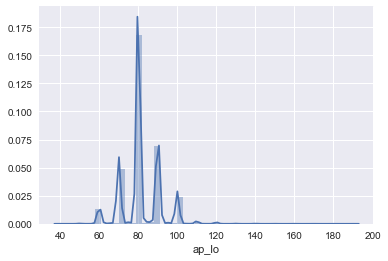

In [6]:
sns.distplot(all.ap_lo);

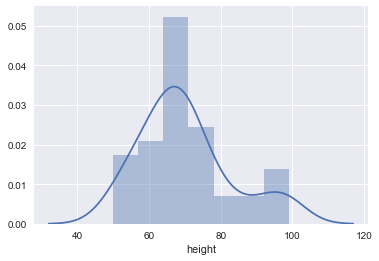

In [46]:
sns.distplot(all[all['height']<100].height);